In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from nltk.corpus import stopwords
import MeCab

In [6]:
yt_jp = pd.read_csv('datasets/JP_youtube_trending_data.csv')
yt_jp.head(2)
# # yt_jp.isna().any()
# # yt_jp.info()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,UYXa8R9vvzA,皆からの色々な質問に何も隠さず答える！びっくりさせたらごめん笑,2020-08-11T10:00:06Z,UCZCzstgLGQdK8GSztJHh0-w,タナカガ,22,2020-08-12T00:00:00Z,[None],778499,34811,667,3939,https://i.ytimg.com/vi/UYXa8R9vvzA/default.jpg,False,False,登録者数30万人ありがとうございます！！！ご機嫌ようみなさま。お久しぶりでございます。なんか...
1,02MaoZ5n-uM,【異次元】世界に伝えたい『This is ギータ』【変態打ち】,2020-08-11T13:36:28Z,UC0v-pxTo1XamIDE-f__Ad0Q,(パーソル パ・リーグTV公式)PacificLeagueTV,17,2020-08-12T00:00:00Z,パーソルパリーグTV|パリーグTV|パシフィックリーグ|Pacificleague|プロ野球,1161952,18514,259,4115,https://i.ytimg.com/vi/02MaoZ5n-uM/default.jpg,False,False,言葉が出ない。スゴすぎて、異次元過ぎて、言葉が出ない。左対左、だけど何となく打ちそうな気はし...


In [7]:
#First make the category of the video from json file
jp_category = pd.read_json('datasets/JP_category_id.json')
jp_category = jp_category['items']

#make a new dataframe that correspond to category on json files
genre_id= []
genre = []

for i in range(0, len(jp_category)-1):
    genre_id.append(str(jp_category[i]).split(", ")[2].split(': ')[-1].strip("'"))
    genre.append(str(jp_category[i]).split(", ")[3].split(': ')[-1].strip("'"))

genre = pd.DataFrame(list(zip(genre_id, genre)), columns=['id', 'genre']).set_index('id')
yt_jp['category'] = yt_jp['categoryId'].apply(lambda x : genre.loc[str(x)]['genre'] if x != 29 else "Nonprofits & Activism")

#drop unrelated columns
yt_jp.drop(['categoryId', 'channelId', 'video_id', 'thumbnail_link'], axis=1, inplace=True)

#Then let's change the published and trending date format
yt_jp['publishedAt'] = pd.to_datetime(yt_jp['publishedAt'], format='%Y-%m-%dT%H:%M:%S')
yt_jp['trending_date'] = pd.to_datetime(yt_jp['trending_date'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
yt_jp_trend = yt_jp.groupby('trending_date').mean().groupby(lambda x: (x.year, x.month)).first()
date = []
for i in yt_jp_trend.index:
    date.append(str(i).split(', ')[0].strip('(') + ", " + str(i).split(', ')[1].strip(')'))
yt_jp_trend['date'] = date

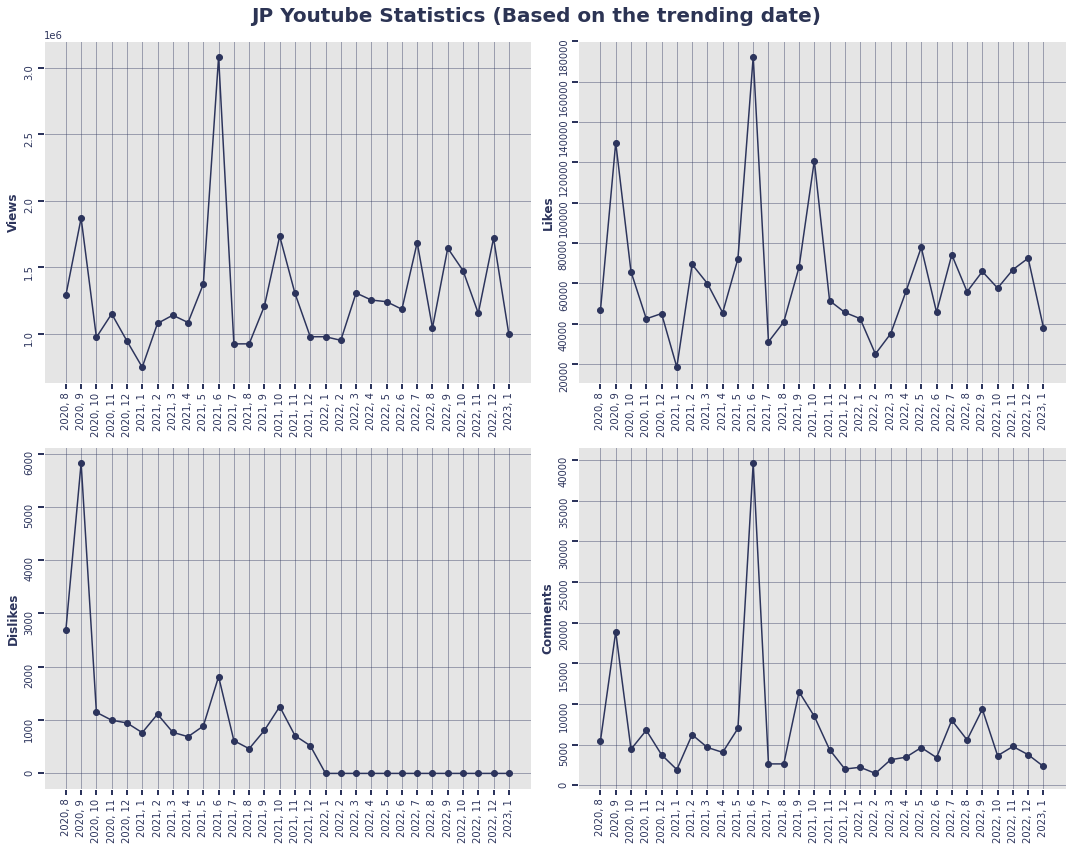

In [9]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 12]
color = '#2c345c'

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(yt_jp_trend['date'], yt_jp_trend['view_count'], color=color, marker='o')
ax[0,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,0].set_ylabel('Views', fontweight='bold')
ax[0,0].yaxis.label.set_color(color)

ax[0,1].plot(yt_jp_trend['date'], yt_jp_trend['likes'], color=color, marker='o')
ax[0,1].tick_params(direction='out', length=6, width=2, colors='#2c345c',
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,1].set_ylabel('Likes', fontweight='bold')
ax[0,1].yaxis.label.set_color(color)

ax[1,0].plot(yt_jp_trend['date'], yt_jp_trend['dislikes'], color=color, marker='o')
ax[1,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,0].set_ylabel('Dislikes', fontweight='bold')
ax[1,0].yaxis.label.set_color(color)

ax[1,1].plot(yt_jp_trend['date'], yt_jp_trend['comment_count'], color=color, marker='o')
ax[1,1].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,1].set_ylabel('Comments', fontweight='bold')
ax[1,1].yaxis.label.set_color(color)

plt.suptitle("JP Youtube Statistics (Based on the trending date)", fontsize=20, fontweight='bold', color = '#2c3454')
plt.tight_layout()
plt.show()

In [10]:
yt_jp_published = yt_jp.groupby('publishedAt').mean().groupby(lambda x: (x.year, x.month)).first()
date = []
for i in yt_jp_published.index:
    date.append(str(i).split(', ')[0].strip('(') + ", " + str(i).split(', ')[1].strip(')'))
yt_jp_published['date'] = date

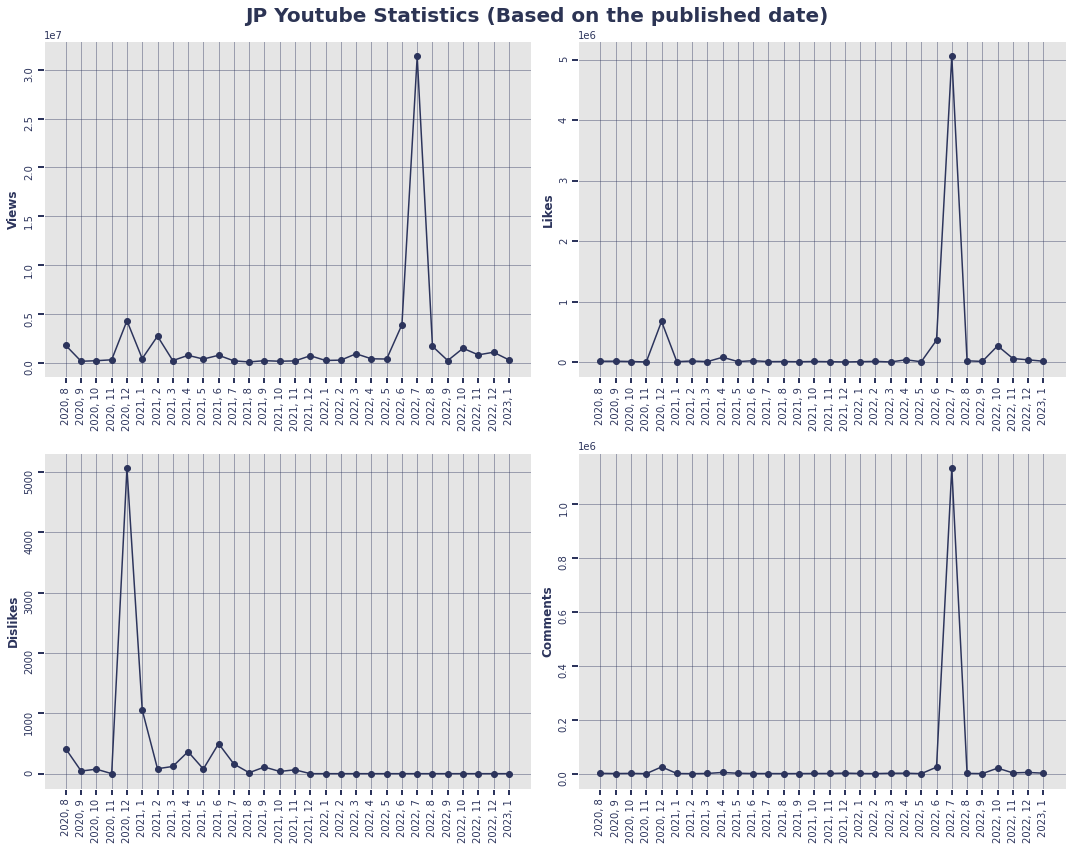

In [11]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 12]
color = '#2c345c'

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(yt_jp_published['date'], yt_jp_published['view_count'], color=color, marker='o')
ax[0,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,0].set_ylabel('Views', fontweight='bold')
ax[0,0].yaxis.label.set_color(color)

ax[0,1].plot(yt_jp_published['date'], yt_jp_published['likes'], color=color, marker='o')
ax[0,1].tick_params(direction='out', length=6, width=2, colors='#2c345c',
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,1].set_ylabel('Likes', fontweight='bold')
ax[0,1].yaxis.label.set_color(color)

ax[1,0].plot(yt_jp_published['date'], yt_jp_published['dislikes'], color=color, marker='o')
ax[1,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,0].set_ylabel('Dislikes', fontweight='bold')
ax[1,0].yaxis.label.set_color(color)

ax[1,1].plot(yt_jp_published['date'], yt_jp_published['comment_count'], color=color, marker='o')
ax[1,1].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,1].set_ylabel('Comments', fontweight='bold')
ax[1,1].yaxis.label.set_color(color)

plt.suptitle("JP Youtube Statistics (Based on the published date)", fontsize=20, fontweight='bold', color = '#2c3454')
plt.tight_layout()
plt.show()

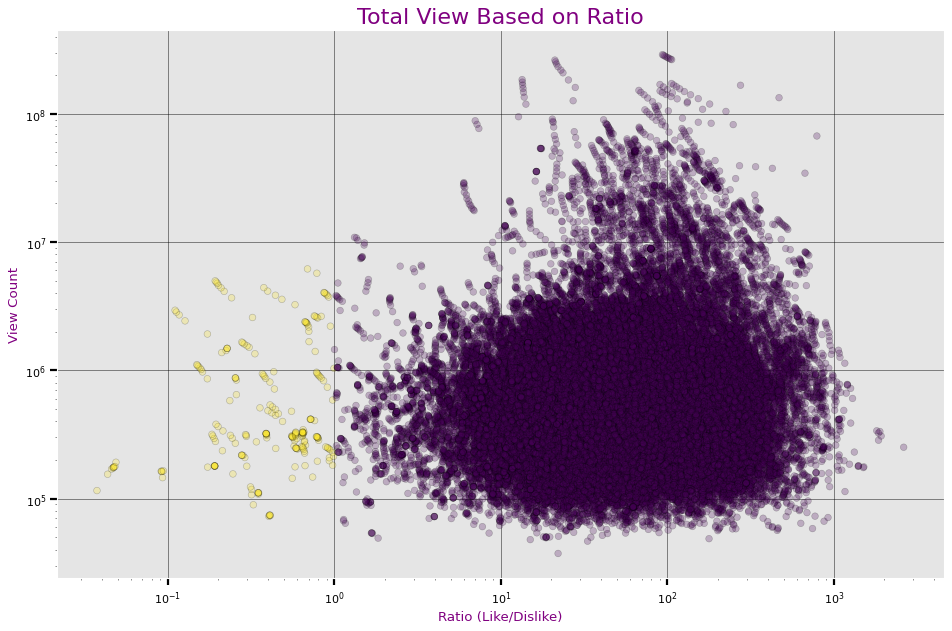

In [12]:
yt_jp['ratio'] = yt_jp['likes'] / yt_jp['dislikes']

plt.figure(figsize=(12, 8), dpi=80)

plt.scatter(yt_jp['ratio'], yt_jp['view_count'], c=yt_jp['ratio'] < 1, alpha=.25, edgecolors='black')
plt.xscale("log") 
plt.yscale("log")
plt.xlabel('Ratio (Like/Dislike)', fontsize=12, color='purple')
plt.ylabel('View Count', fontsize=12, color='purple')
plt.tick_params(direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5)

plt.title('Total View Based on Ratio', fontsize=20, color='purple')
plt.tight_layout()
plt.show()

In [13]:
yt_jp['day_to_trend'] = (yt_jp['trending_date'] - yt_jp['publishedAt']).dt.days
yt_jp['day_to_trend'].describe()

count    176381.000000
mean          4.016391
std           2.743632
min          -1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          25.000000
Name: day_to_trend, dtype: float64

In [17]:
#Create a new df that spesifics to certain years
yt_jp_2020 = yt_jp[yt_jp.trending_date.dt.year == 2020]
yt_jp_2021 = yt_jp[yt_jp.trending_date.dt.year == 2021]
yt_jp_2022 = yt_jp[yt_jp.trending_date.dt.year == 2022]

In [15]:
# def mecab_analysis(text):
#     t = MeCab.Tagger("-Ochasen")
#     t.parse('')
#     node = t.parseToNode(text) 
#     output = []
#     while node:
#         if node.surface != "":
#             word_type = node.feature.split(",")[0]
#             if word_type in ["形容詞", "動詞","名詞", "副詞"]:
#                 output.append(node.surface)
#         node = node.next
#         if node is None:
#             break
#     return output

# jp_stopwords = [ 'てる', 'いる', 'なる', 'れる', 'する', 'ある', 'こと', 'これ', 'さん', 'して', \
#              'くれる', 'やる', 'くださる', 'そう', 'せる', 'した',  '思う',  \
#              'それ', 'ここ', 'ちゃん', 'くん', '', 'て','に','を','は','の', 'が', 'と', 'た', 'し', 'で', \
#              'ない', 'も', 'な', 'い', 'か', 'ので', 'よう', '', 'れ','さ','なっ']

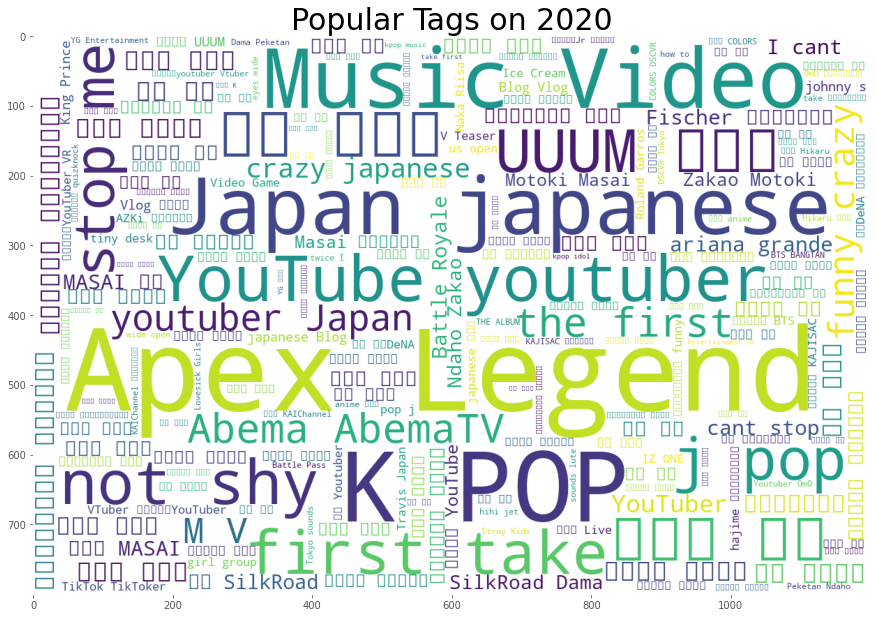

In [19]:
yt_jp_2020_tags = []

for i in yt_jp_2020['tags']:
    for j in str(i).split('|'):
        yt_jp_2020_tags.append(j)
jp_tags_2020 = " ".join([word for word in yt_jp_2020_tags])

# jp_tags_2020 = mecab_analysis(jp_tags_2020)

jp_wc_2020 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(jp_tags_2020)
plt.title("Popular Tags on 2020", fontsize=30)
plt.grid(False)
plt.imshow(jp_wc_2020)

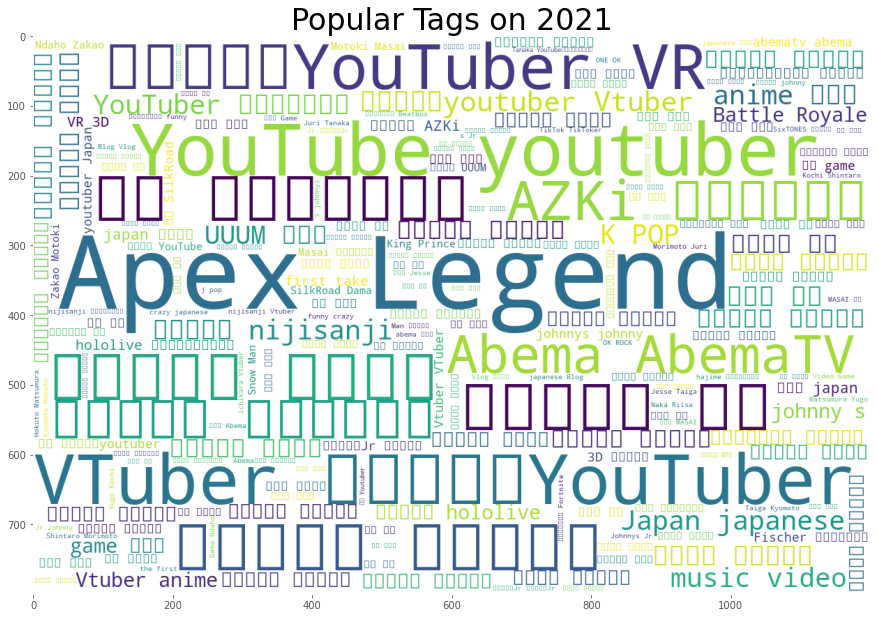

In [20]:
yt_jp_2021_tags = []

for i in yt_jp_2021['tags']:
    for j in str(i).split('|'):
        yt_jp_2021_tags.append(j)
jp_tags_2021 = " ".join([word for word in yt_jp_2021_tags])

# jp_tags_2020 = mecab_analysis(jp_tags_2020)

jp_wc_2021 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(jp_tags_2021)
plt.title("Popular Tags on 2021", fontsize=30)
plt.grid(False)
plt.imshow(jp_wc_2021)

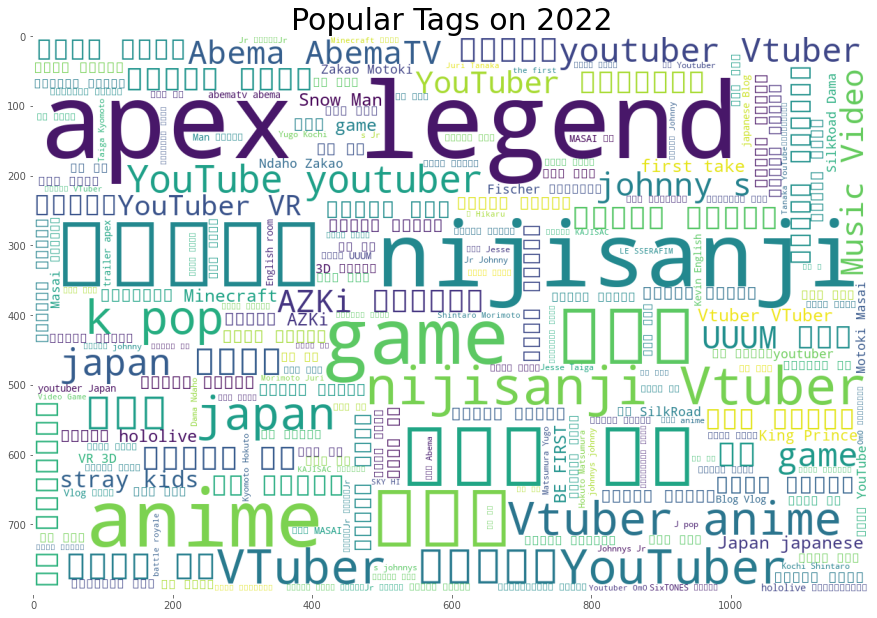

In [22]:
yt_jp_2022_tags = []

for i in yt_jp_2022['tags']:
    for j in str(i).split('|'):
        yt_jp_2022_tags.append(j)
jp_tags_2022 = " ".join([word for word in yt_jp_2022_tags])

# jp_tags_2020 = mecab_analysis(jp_tags_2020)

jp_wc_2022 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(jp_tags_2022)
plt.title("Popular Tags on 2022", fontsize=30)
plt.grid(False)
plt.imshow(jp_wc_2022)

In [ ]:
# # text_file = open("C:\\Users\\HP G7\Desktop\\IMPORTANT!!!\\KuliahNew\\Side Quest\\Latihan Program\\Personal\\Personal Project\\DSProjects\\Youtube\\jpwordcloud\\jp_tag_2020.txt", "w")
# # text_file.write(jp_tags_2020)
# # text_file.close()

# with open('data.txt', "w", encoding="utf-8") as f:
#     f.write(jp_tags_2020)

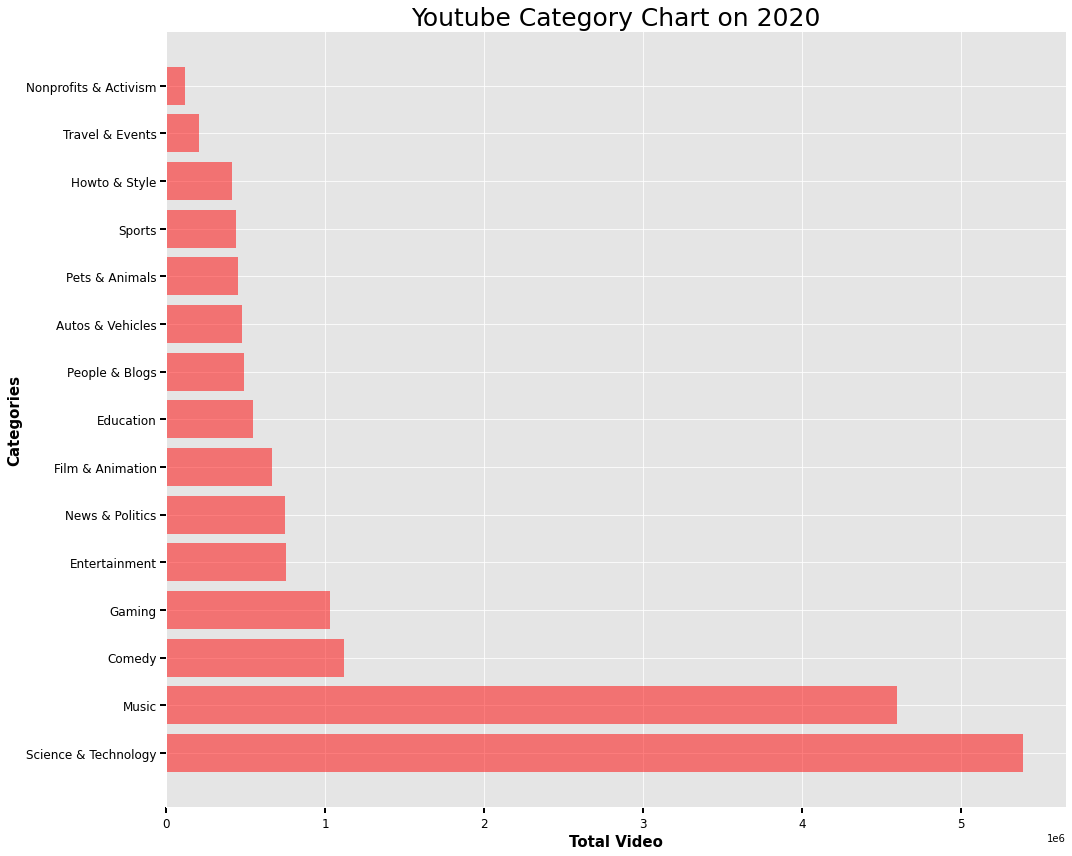

In [23]:
yt_jp_2020_category = yt_jp_2020.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_jp_2020_category.index, yt_jp_2020_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2020', fontsize=25)

plt.tight_layout()
plt.show()

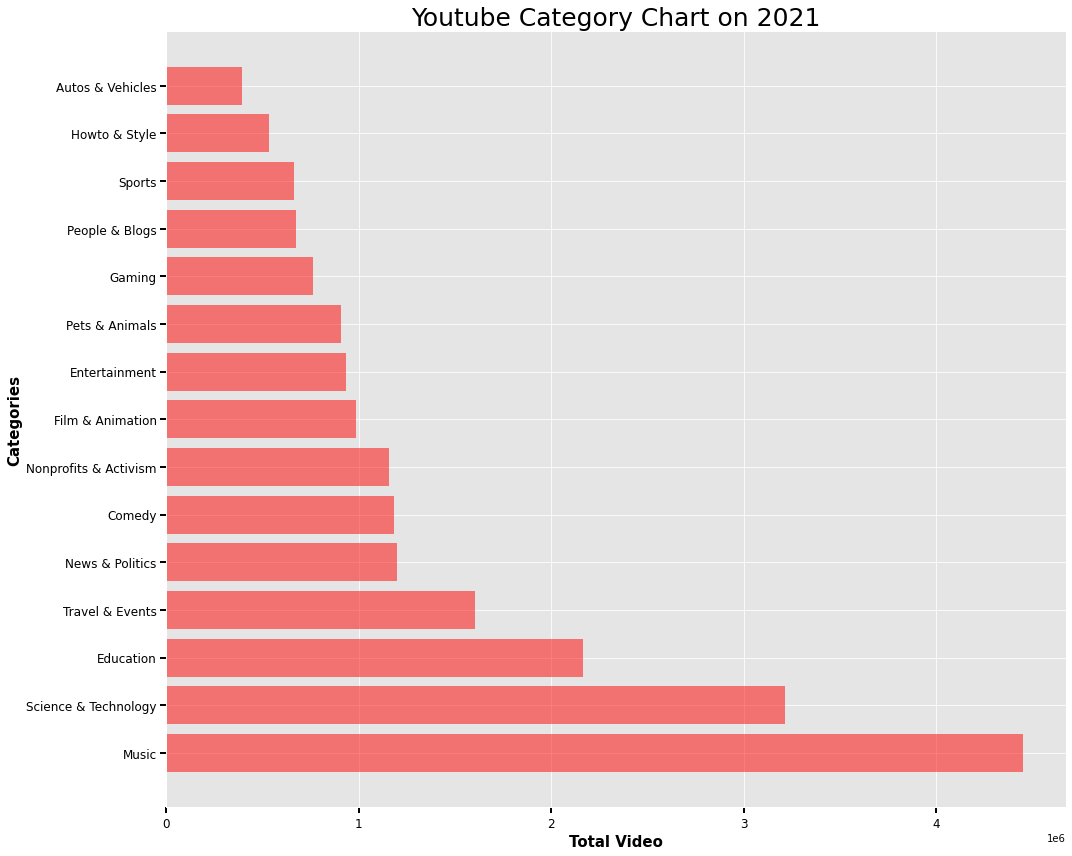

In [24]:
yt_jp_2021_category = yt_jp_2021.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_jp_2021_category.index, yt_jp_2021_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2021', fontsize=25)

plt.tight_layout()
plt.show()

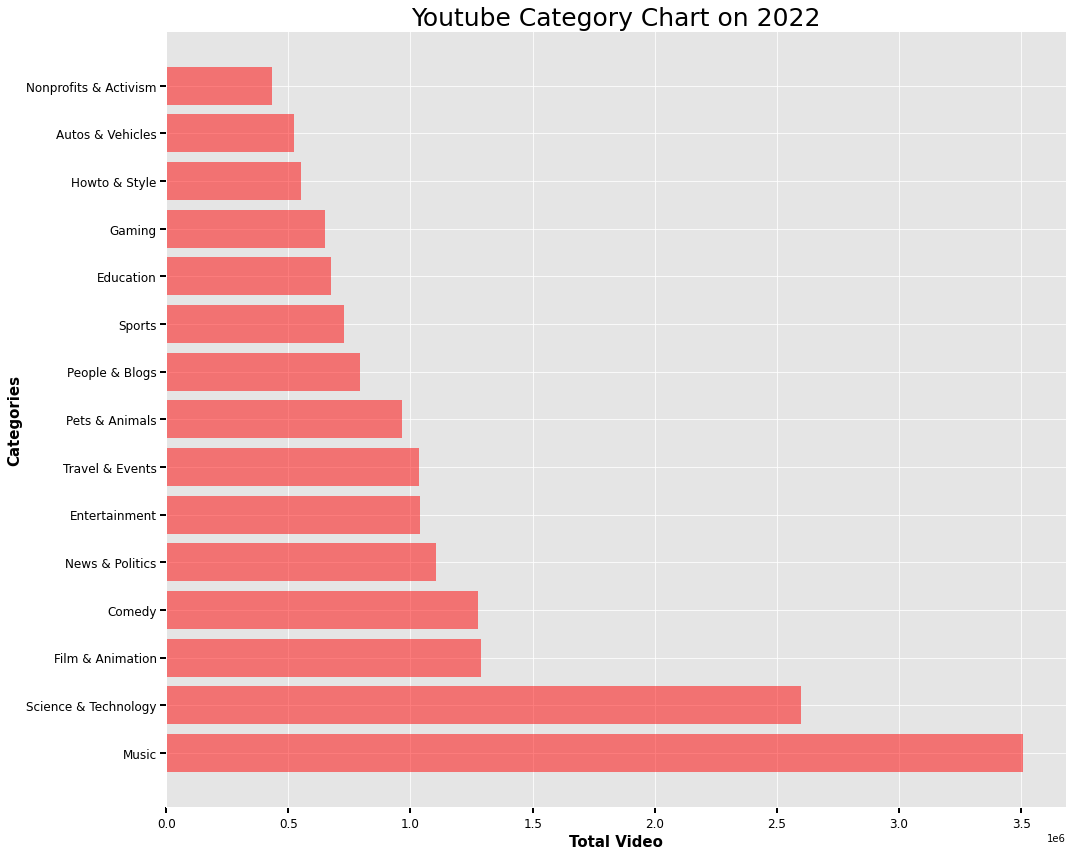

In [25]:
yt_jp_2022_category = yt_jp_2022.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_jp_2022_category.index, yt_jp_2022_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2022', fontsize=25)

plt.tight_layout()
plt.show()